In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from codes.algorithm import GHS
from codes.algorithm import average_each_segment

import cv2
import matplotlib.pyplot as plt
import numpy as np

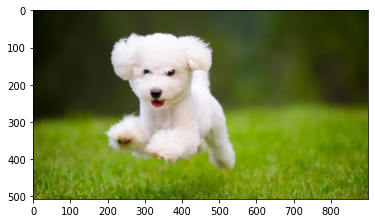

(507, 900, 3)


In [19]:
img = plt.imread('img.jpg')

#convert to 0-1
img = img/255
img = np.clip(img, 0, 1)
plt.imshow(img)
plt.show()
print(img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


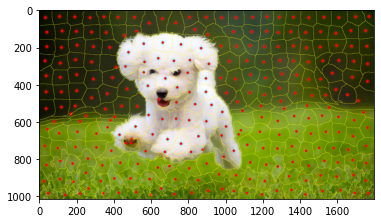

In [27]:
import networkx as nx
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

segment_dict = {}
segments = slic(img, n_segments=300, compactness=10, sigma=1)

for i in range(np.max(segments) + 1):
    if len(img[segments == i]) == 0:
        continue
    segment_dict[i] = {'rgb':np.mean(img[segments == i], axis=0), 'xy':np.mean(np.where(segments == i), axis=1), 'size':len(img[segments == i])}

copy = img.copy()
for i in range(np.max(segments) + 1):
    if len(img[segments == i]) == 0:
        continue
    cv2.circle(copy, (int(segment_dict[i]['xy'][1]), int(segment_dict[i]['xy'][0])), 2, (255, 0, 0), 2)

plt.imshow(mark_boundaries(copy, segments, mode='subpixel'))
plt.show()

In [29]:
img_arrays = []

img_gh_sup, segs_gh_sup = GHS(img, 0.05, 2000)
img_arrays.append(img_gh_sup)

img_gh_sup2, segs_gh_sup2 = GHS(img_gh_sup, 0.1, 1000)
img_arrays.append(img_gh_sup2)

img_gh_sup3, segs_gh_sup3 = GHS(img_gh_sup2, 0.1, 1000)
img_arrays.append(img_gh_sup3)

img_gh_sup4, segs_gh_sup4 = GHS(img_gh_sup3, 0.12, 1000)
img_arrays.append(img_gh_sup4)

img_gh_sup5, segs_gh_sup5 = GHS(img_gh_sup4, 0.25, 200)
img_arrays.append(img_gh_sup5)

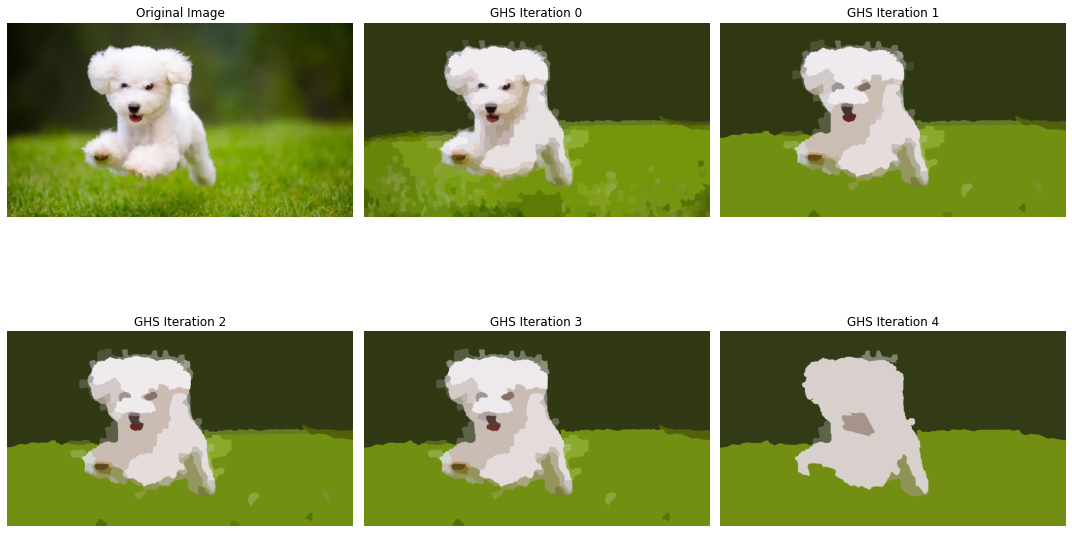

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for idx, image in enumerate(img_arrays):
    ax = axes[(idx+1) // 3][(idx+1)  % 3]  # Adjusting position for 3x2 layout
    ax.imshow(image)
    ax.set_title(f'GHS Iteration {idx}')
    ax.axis('off')

plt.tight_layout()
plt.show()
